<a href="https://colab.research.google.com/github/alliwene/gb-november-grp2-health-insurance/blob/main/dhs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
import os, random 
ROOT = "/content/drive"     # default location for the drive

drive.mount(ROOT) 

Mounted at /content/drive


In [ ]:
# age, level of education, religion, occupation, wealth index, sex and age of 
# household head, place of residence, gender, ethnic group, exposure to mass media 
# level of education, 

# Types of Health Insurance coverage owned by the respondents

In [2]:
# set file path
path = "/content/drive/MyDrive"
os.chdir(path)
!ls # list files in the path

 1-s2.0-S2352340918313520-mmc2.xlsx  'Colab Notebooks'	 NGIR7AFL.SAV


In [3]:
# install pyreadstat to read the spss file
!pip install pyreadstat --quiet 

     |████████████████████████████████| 2.4MB 8.3MB/s 


In [4]:
# import required libraries 

import pandas as pd
import numpy as np 
import pyreadstat
from pprint import pprint

## Load Data and Clean

In [5]:
# read in the data to a dataframe and get corresponding metadata
df, meta = pyreadstat.read_sav('NGIR7AFL.SAV')
df.head() 

,CASEID,V000,V001,V002,V003,V004,V005,V006,V007,V008,V008A,V009,V010,V011,V012,V013,V014,V015,V016,V017,V018,V019,V019A,V020,V021,V022,V023,V024,V025,V026,V027,V028,V029,V030,V031,V032,V034,V040,V042,V044,...,S434IE$3,S434IE$4,S434IE$5,S434IE$6,S434IF$1,S434IF$2,S434IF$3,S434IF$4,S434IF$5,S434IF$6,S434IG$1,S434IG$2,S434IG$3,S434IG$4,S434IG$5,S434IG$6,S434IX$1,S434IX$2,S434IX$3,S434IX$4,S434IX$5,S434IX$6,S434IZ$1,S434IZ$2,S434IZ$3,S434IZ$4,S434IZ$5,S434IZ$6,S434K$1,S434K$2,S434K$3,S434K$4,S434K$5,S434K$6,S434L$1,S434L$2,S434L$3,S434L$4,S434L$5,S434L$6
0,1 1 2,NG7,1.0,1.0,2.0,1.0,1335530.0,9.0,2018.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,1.0,2.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,706.0,NaN,701.0,NaN,NaN,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1 6 4,NG7,1.0,6.0,4.0,1.0,1335530.0,9.0,2018.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,1.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,704.0,NaN,701.0,NaN,NaN,NaN,100.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 11 1,NG7,1.0,11.0,1.0,1.0,1335530.0,9.0,2018.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,1.0,2.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,704.0,NaN,701.0,NaN,NaN,0.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1 25 2,NG7,1.0,25.0,2.0,1.0,1335530.0,9.0,2018.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,1.0,2.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,705.0,NaN,701.0,NaN,NaN,1.0,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1 30 1,NG7,1.0,30.0,1.0,1.0,1335530.0,9.0,2018.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,1.0,2.0,1357.0,12.0,69.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,705.0,NaN,701.0,NaN,NaN,NaN,100.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape 

(41821, 5394)

In [7]:
# column labels from metadata
print(meta.column_labels) 

['Case Identification', 'Country code and phase', 'Cluster number', 'Household number', "Respondent's line number", 'Ultimate area unit', "Women's individual sample weight (6 decimals)", 'Month of interview', 'Year of interview', 'Date of interview (CMC)', 'Date of interview Century Day Code (CDC)', "Respondent's month of birth", "Respondent's year of birth", 'Date of birth (CMC)', "Respondent's current age", 'Age in 5-year groups', 'Completeness of age information', 'Result of individual interview', 'Day of interview', 'CMC start of calendar', 'Row of month of interview', 'Length of calendar', 'Number of calendar columns', 'Ever-married sample', 'Primary sampling unit', 'Sample strata for sampling errors', 'Stratification used in sample design', 'Region', 'Type of place of residence', 'NA - De facto place of residence', 'Number of visits', 'Interviewer identification', 'NA - Keyer identification', 'Field supervisor', 'NA - Field editor', 'NA - Office editor', 'Line number of husband',

In [21]:
# check if target column in column labels 
'Covered by health insurance' in meta.column_labels 

True

In [22]:
# get dictionary with column name as key and column label as value from metadata
labels_dict = meta.column_names_to_labels
pprint(labels_dict)  

Streaming output truncated to the last 5000 lines.
         'hurting her',
 'D112A': 'Frequency of physically hurting husband/partner in last 12 months',
 'D113': 'Husband/partner drinks alcohol',
 'D114': 'Frequency of husband/partner being drunk',
 'D115B': 'Mother: Person who has ever physically hurt respondent',
 'D115C': 'Father: Person who has ever physically hurt respondent',
 'D115D': 'Daughter/Son: Person who has ever physically hurt respondent',
 'D115E': 'NA - Son: Person who has ever physically hurt respondent',
 'D115F': 'Sister/brother: Person who has ever physically hurt respondent',
 'D115G': 'Other relative: Person who has ever physically hurt respondent',
 'D115H': 'NA - Other female family: Person who has ever physically hurt '
          'respondent',
 'D115I': 'NA - Other male family: Person who has ever physically hurt '
          'respondent',
 'D115J': 'NA - Former partner: Person who has ever physically hurt respondent',
 'D115K': 'Current boyfriend: Person who 

In [23]:
# get key from value in dict
print(list(labels_dict.keys())[list(labels_dict.values()).index(
    'Covered by health insurance')]) 

V481


In [24]:
# get variable names for each column from metadata
variable_values = meta.variable_value_labels   
pprint(variable_values)

Streaming output truncated to the last 5000 lines.
             8.0: "Don't know"},
 'ML15A$4': {0.0: 'Same day as fever/cough',
             1.0: 'Next day',
             2.0: '2 days after',
             3.0: '3 days after',
             4.0: '4+ days after',
             8.0: "Don't know"},
 'ML15A$5': {0.0: 'Same day as fever/cough',
             1.0: 'Next day',
             2.0: '2 days after',
             3.0: '3 days after',
             4.0: '4+ days after',
             8.0: "Don't know"},
 'ML15A$6': {0.0: 'Same day as fever/cough',
             1.0: 'Next day',
             2.0: '2 days after',
             3.0: '3 days after',
             4.0: '4+ days after',
             8.0: "Don't know"},
 'ML15B$1': {7.0: '7+ days', 8.0: "Don't know"},
 'ML15B$2': {7.0: '7+ days', 8.0: "Don't know"},
 'ML15B$3': {7.0: '7+ days', 8.0: "Don't know"},
 'ML15B$4': {7.0: '7+ days', 8.0: "Don't know"},
 'ML15B$5': {7.0: '7+ days', 8.0: "Don't know"},
 'ML15B$6': {7.0: '7+ days', 8.0: "Don

In [9]:
# drop caseid column
df.drop('CASEID', axis=1, inplace=True)

In [10]:
# check if unique values of a col is equal to 1
# coulmns like this would be useless for a model
empty_unique = []
for col in df.columns:
  if len(df[col].unique()) == 1:
    empty_unique.append(col) 

print(empty_unique)
print(len(empty_unique))

['V000', 'V007', 'V015', 'V017', 'V019A', 'V020', 'V026', 'V029', 'V031', 'V032', 'V103', 'V134', 'AWFACTT', 'AWFACTU', 'AWFACTR', 'AWFACTE', 'AWFACTW', 'V156', 'V166', 'BIDX$18', 'BIDX$19', 'BIDX$20', 'BORD$18', 'BORD$19', 'BORD$20', 'B0$18', 'B0$19', 'B0$20', 'B1$18', 'B1$19', 'B1$20', 'B2$18', 'B2$19', 'B2$20', 'B3$18', 'B3$19', 'B3$20', 'B4$18', 'B4$19', 'B4$20', 'B5$18', 'B5$19', 'B5$20', 'B6$17', 'B6$18', 'B6$19', 'B6$20', 'B7$17', 'B7$18', 'B7$19', 'B7$20', 'B8$18', 'B8$19', 'B8$20', 'B9$18', 'B9$19', 'B9$20', 'B10$18', 'B10$19', 'B10$20', 'B11$17', 'B11$18', 'B11$19', 'B11$20', 'B12$01', 'B12$18', 'B12$19', 'B12$20', 'B13$17', 'B13$18', 'B13$19', 'B13$20', 'B15$17', 'B15$18', 'B15$19', 'B15$20', 'B16$18', 'B16$19', 'B16$20', 'B17$18', 'B17$19', 'B17$20', 'B18$18', 'B18$19', 'B18$20', 'B19$18', 'B19$19', 'B19$20', 'B20$07', 'B20$08', 'B20$09', 'B20$10', 'B20$11', 'B20$12', 'B20$13', 'B20$14', 'B20$15', 'B20$16', 'B20$17', 'B20$18', 'B20$19', 'B20$20', 'V302', 'V304A$01', 'V304A$

In [11]:
# drop the columns
df.drop(empty_unique, axis=1, inplace=True)
df.head() 

,V001,V002,V003,V004,V005,V006,V008,V008A,V009,V010,V011,V012,V013,V014,V016,V018,V019,V021,V022,V023,V024,V025,V027,V028,V030,V034,V040,V042,V044,V045A,V045B,V045C,V046,V101,V102,V104,V105,V105A,V106,V107,...,S430EL$3,S430EL$4,S430EL$5,S430EL$6,S430EX$1,S430EX$2,S430EX$3,S430EX$4,S430EX$5,S430EX$6,S430EZ$1,S430EZ$2,S430EZ$3,S430EZ$4,S430EZ$5,S430EZ$6,S430G$1,S430G$2,S430G$3,S430G$4,S430G$5,S430G$6,S433A$1,S433A$2,S433A$3,S433A$4,S434C$1,S434E$1,S434H$1,S434IA$1,S434IB$1,S434IC$1,S434ID$1,S434IE$1,S434IF$1,S434IG$1,S434IX$1,S434IZ$1,S434K$1,S434L$1
0,1.0,1.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,2.0,706.0,701.0,0.0,100.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,8.0,2.0,18.0,3.0,3.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,115.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,124.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,6.0,4.0,1.0,1335530.0,9.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,NaN,100.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,NaN,NaN,2.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,11.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,0.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,5.0,3.0,18.0,3.0,3.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1.0,25.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,1.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,2.0,2.0,37.0,3.0,2.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1.0,30.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,NaN,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,NaN,NaN,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# df.loc[:, df.isna().mean() < .2]

In [20]:
# filter dataframe using columns with no null values 
df = df.loc[:, df.isna().sum() == 0]
df.head()

,V001,V002,V003,V004,V005,V006,V008,V008A,V009,V010,V011,V012,V013,V014,V016,V018,V019,V021,V022,V023,V024,V025,V027,V028,V030,V040,V042,V044,V045A,V045B,V045C,V046,V101,V102,V104,V106,V113,V115,V116,V119,...,VCAL$1,VCAL$2,MMC1,SSTATE,S653A,S653B,S653C,S653D,S653E,S653F,S653G,S653H,S653I,S653J,S653K,S653L,S653M,S653N,S653O,S653P,S653Q,S653R,S653S,S653T,S653U,S653V,S815E,S815F,S815G,S815H,S815I,S1108AB,S1108AC,S1108AD,S1108AF,S1108AI,S1108BA,S1108BC,S1108BD,S1108BF
0,1.0,1.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,2.0,706.0,701.0,100.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,8.0,3.0,14.0,10.0,11.0,1.0,...,0000000000000BPPPPPPPP0000000000000...,,4.0,180.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,6.0,4.0,1.0,1335530.0,9.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,92.0,996.0,12.0,1.0,...,00000000000000000000000000000000000...,,2.0,180.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,11.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,5.0,3.0,14.0,20.0,11.0,1.0,...,000000000BPPPPPPPP00000000000000000...,,5.0,180.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,25.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,2.0,3.0,51.0,996.0,11.0,1.0,...,LLLLLLLLLLLLLLLLLBPPPPPPPP000000000...,,4.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,30.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,14.0,20.0,11.0,1.0,...,00000000000000000000000000000000000...,,2.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [26]:
# check for columns with duplicate labels in df
duplicate_list = []
for col in df.columns:
  if '$' in col:
    duplicate_list.append(col)
print(duplicate_list)

['V304$01', 'V304$02', 'V304$03', 'V304$05', 'V304$06', 'V304$07', 'V304$08', 'V304$09', 'V304$10', 'V304$11', 'V304$13', 'V304$14', 'V304$16', 'V304$17', 'V304$18', 'VCAL$1', 'VCAL$2']


In [28]:
# drop duplicate column labels 
df.drop(duplicate_list, axis=1, inplace=True)
df.head()

,V001,V002,V003,V004,V005,V006,V008,V008A,V009,V010,V011,V012,V013,V014,V016,V018,V019,V021,V022,V023,V024,V025,V027,V028,V030,V040,V042,V044,V045A,V045B,V045C,V046,V101,V102,V104,V106,V113,V115,V116,V119,...,V815B,V815C,MMC1,SSTATE,S653A,S653B,S653C,S653D,S653E,S653F,S653G,S653H,S653I,S653J,S653K,S653L,S653M,S653N,S653O,S653P,S653Q,S653R,S653S,S653T,S653U,S653V,S815E,S815F,S815G,S815H,S815I,S1108AB,S1108AC,S1108AD,S1108AF,S1108AI,S1108BA,S1108BC,S1108BD,S1108BF
0,1.0,1.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,2.0,706.0,701.0,100.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,8.0,3.0,14.0,10.0,11.0,1.0,...,0.0,0.0,4.0,180.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,6.0,4.0,1.0,1335530.0,9.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,92.0,996.0,12.0,1.0,...,0.0,0.0,2.0,180.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1.0,11.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,5.0,3.0,14.0,20.0,11.0,1.0,...,0.0,0.0,5.0,180.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,25.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,2.0,3.0,51.0,996.0,11.0,1.0,...,0.0,0.0,4.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,30.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,14.0,20.0,11.0,1.0,...,0.0,0.0,2.0,180.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
df1 = df.copy()
df1.head()

,CASEID,V001,V002,V003,V004,V005,V006,V008,V008A,V009,V010,V011,V012,V013,V014,V016,V018,V019,V021,V022,V023,V024,V025,V027,V028,V030,V040,V042,V044,V045A,V045B,V045C,V046,V101,V102,V104,V106,V113,V115,V116,...,S653C,S653D,S653E,S653F,S653G,S653H,S653I,S653J,S653K,S653L,S653M,S653N,S653O,S653P,S653Q,S653R,S653S,S653T,S653U,S653V,S815E,S815F,S815G,S815H,S815I,S816A,S816B,S816C,S816D,S816E,S816X,S1108AB,S1108AC,S1108AD,S1108AF,S1108AI,S1108BA,S1108BC,S1108BD,S1108BF
0,1 1 2,1.0,1.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,2.0,706.0,701.0,100.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,8.0,3.0,14.0,10.0,11.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1 6 4,1.0,6.0,4.0,1.0,1335530.0,9.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,92.0,996.0,12.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1 11 1,1.0,11.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,5.0,3.0,14.0,20.0,11.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1 25 2,1.0,25.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,2.0,3.0,51.0,996.0,11.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1 30 1,1.0,30.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,14.0,20.0,11.0,...,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# change column labels to column names 
df1.columns = df1.columns.map(labels_dict)
df1.head()

,Case Identification,Cluster number,Household number,Respondent's line number,Ultimate area unit,Women's individual sample weight (6 decimals),Month of interview,Date of interview (CMC),Date of interview Century Day Code (CDC),Respondent's month of birth,Respondent's year of birth,Date of birth (CMC),Respondent's current age,Age in 5-year groups,Completeness of age information,Day of interview,Row of month of interview,Length of calendar,Primary sampling unit,Sample strata for sampling errors,Stratification used in sample design,Region,Type of place of residence,Number of visits,Interviewer identification,Field supervisor,Cluster altitude in meters,Household selected for hemoglobin,Selected for Domestic Violence module,Language of questionnaire,Language of interview,Native language of respondent,Translator used,Region,Type of place of residence,Years lived in place of residence,Highest educational level,Source of drinking water,Time to get to water source,Type of toilet facility,...,Respondent ate: any white roots and tubers or plantains,Respondent ate: any dark green leafy vegetables,Respondent ate: any fruits that are dark yellow or orange inside,Respondent ate: any other fruits,Respondent ate: any other vegetables,Respondent ate: any meat made from animal organs,Respondent ate: any other types of meat or poultry,Respondent ate: any eggs,"Respondent ate: any fish or seafood, fresh or dried",Respondent ate: any beans or peas,Respondent ate: any nuts or seeds,Respondent ate: any milk or milk products,Respondent ate: any insects and other small protein foods,Respondent ate: any red palm oil,Respondent ate: any other oils and fats,Respondent ate: any savoury and fried snacks,Respondent ate: any sweets,Respondent ate: sugar-sweetened beverages,Respondent ate: any condiments and seasonings,Respondent ate: any other beverages and foods,Read/heard from social media,Read in a poster,Read in a leaflet or brochures,Heard from town crier,Heard from mobile public announcement,Heard/seen family planning message: as for me and my partner,Heard/seen family planning message: unspaced children,Heard/seen family planning message: well-spaced children,Heard/seen family planning message: it's not too late,Heard/seen family planning message: why is your wife,Heard/seen family planning message: other,Preventative medicine keeps mother healthy,Preventative medicine keeps baby healthy,Test is the only diagnosis,Seek treatment with a negative test result,Malaria can be fully cured by medicine,Malaria can lead to death,No worry about malaria due to easy treatment,Know people sick with malaria,Only weak children can die from malaria
0,1 1 2,1.0,1.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,2.0,706.0,701.0,100.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,8.0,3.0,14.0,10.0,11.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1 6 4,1.0,6.0,4.0,1.0,1335530.0,9.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,2.0,92.0,996.0,12.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
2,1 11 1,1.0,11.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,5.0,3.0,14.0,20.0,11.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1 25 2,1.0,25.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,2.0,3.0,51.0,996.0,11.0,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0

In [ ]:
new_dict = {}

for col in df.columns:
  vals = labels_dict[col] 
  new_dict[col] = vals

pprint(new_dict)
# len(new_dict)

{'CASEID': 'Case Identification',
 'ML101': 'Type of mosquito bed net(s) slept under last night',
 'MM1$01': 'Sex of sibling',
 'MM1$02': 'Sex of sibling',
 'MM1$03': 'Sex of sibling',
 'MM2$01': 'Survival status of sibling',
 'MM2$02': 'Survival status of sibling',
 'MM2$03': 'Survival status of sibling',
 'MM3$01': "Sibling's current age",
 'MM3$02': "Sibling's current age",
 'MM4$01': "Sibling's date of birth (CMC)",
 'MM4$02': "Sibling's date of birth (CMC)",
 'MM4$03': "Sibling's date of birth (CMC)",
 'MMC1': 'Number of siblings of respondent',
 'MMC2': "Number of siblings born before respondent's birth",
 'MMIDX$01': 'Index to Maternal Mortality',
 'MMIDX$02': 'Index to Maternal Mortality',
 'MMIDX$03': 'Index to Maternal Mortality',
 'S1108AB': 'Preventative medicine keeps mother healthy',
 'S1108AC': 'Preventative medicine keeps baby healthy',
 'S1108AD': 'Test is the only diagnosis',
 'S1108AF': 'Seek treatment with a negative test result',
 'S1108AI': 'Malaria can be fully c

303

In [ ]:
# Birth History, What was applied, Anything applied, Means of transportation, 
# Tool for cutting, Time of being bathed, Time used to decide transferring, HIV,
# interview, supervisor, beating, ideal, calender, sex

In [ ]:
# create a list that contains vague column names 

to_drop = []

for col in df1.columns:
  if 'condom' in col:
    to_drop.append(col)
  # if 'All woman factor' in col:
  #   to_drop.append(col)
  # if 'Birth column number' in col:
  #   to_drop.append(col)
  # if 'Birth order number' in col:
  #   to_drop.append(col)
  # if 'Assistance' in col:
  #   to_drop.append(col)
  if 'HIV' in col:
    to_drop.append(col)
  if 'supervisor' in col:
    to_drop.append(col)
  if 'interview' in col:
    to_drop.append(col)


print(to_drop)
print(len(to_drop))

['Month of interview', 'Date of interview (CMC)', 'Date of interview Century Day Code (CDC)', 'Day of interview', 'Row of month of interview', 'Field supervisor', 'Language of interview', 'Births in month of interview', 'Reduce risk of getting HIV: always use condoms during sex', 'Reduce risk of getting HIV: always use condoms during sex', 'Reduce risk of getting HIV: have 1 sex partner only, who has no other partners', 'Can get HIV from mosquito bites', 'Can get HIV by sharing food with person who has AIDS', 'A healthy looking person can have HIV', 'HIV transmitted during pregnancy', 'HIV transmitted during delivery', 'HIV transmitted by breastfeeding', 'Would be ashamed if someone in the family had HIV', 'Wife justified asking husband to use condom if he has STI', 'Can get HIV by witchcraft or supernatural means', 'Drugs to avoid HIV transmission to baby during pregnancy', 'Would buy vegetables from vendor with HIV', 'Children with HIV should be allowed to attend school with children

In [ ]:
df1.drop(to_drop, axis=1, inplace=True)
df1.head()

,Case Identification,Cluster number,Household number,Respondent's line number,Ultimate area unit,Women's individual sample weight (6 decimals),Month of interview,Date of interview (CMC),Date of interview Century Day Code (CDC),Respondent's month of birth,Respondent's year of birth,Date of birth (CMC),Respondent's current age,Age in 5-year groups,Completeness of age information,Day of interview,Row of month of interview,Length of calendar,Primary sampling unit,Sample strata for sampling errors,Stratification used in sample design,Region,Type of place of residence,Number of visits,Interviewer identification,Field supervisor,Line number of husband,Cluster altitude in meters,Household selected for hemoglobin,Selected for Domestic Violence module,Language of questionnaire,Language of interview,Native language of respondent,Translator used,Region,Type of place of residence,Years lived in place of residence,Type of place of previous residence,Region of previous residence,Highest educational level,...,Means of transportation: carried,Means of transportation: carried,Means of transportation: carried,Means of transportation: carried,Means of transportation: other,Means of transportation: other,Means of transportation: other,Means of transportation: other,Means of transportation: other,Means of transportation: other,Means of transportation: don't know,Means of transportation: don't know,Means of transportation: don't know,Means of transportation: don't know,Means of transportation: don't know,Means of transportation: don't know,Time used to decide transferring to health facility,Time used to decide transferring to health facility,Time used to decide transferring to health facility,Time used to decide transferring to health facility,Time used to decide transferring to health facility,Time used to decide transferring to health facility,Reason for caesarean section,Reason for caesarean section,Reason for caesarean section,Reason for caesarean section,Time of being bathed after birth,Tool for cutting the cord,Anything applied to the stump of the cord,What was applied: Chlorhexidine,What was applied: other antiseptic,What was applied: olive oil,What was applied: ash,What was applied: animal dung,What was applied: tumeric,What was applied: toothpaste,What was applied: other,What was applied: don't know,Whether chlorhexidine was applied to the stump,Time when chlorhexidine was applied after cord cut
0,1 1 2,1.0,1.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,3.0,1978.0,939.0,40.0,6.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,2.0,706.0,701.0,0.0,100.0,0.0,0.0,1.0,1.0,4.0,0.0,1.0,1.0,8.0,2.0,18.0,3.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,115.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,124.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1 6 4,1.0,6.0,4.0,1.0,1335530.0,9.0,1425.0,43344.0,6.0,2002.0,1230.0,16.0,1.0,1.0,1.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,NaN,100.0,1.0,1.0,1.0,1.0,9.0,0.0,1.0,1.0,95.0,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1 11 1,1.0,11.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1981.0,977.0,37.0,5.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,704.0,701.0,0.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,5.0,3.0,18.0,3.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,1 25 2,1.0,25.0,2.0,1.0,1335530.0,9.0,1425.0,43345.0,11.0,1990.0,1091.0,27.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,701.0,1.0,100.0,0.0,0.0,1.0,1.0,9.0,0.0,1.0,1.0,2.0,2.0,37.0,3.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,1 30 1,1.0,30.0,1.0,1.0,1335530.0,9.0,1425.0,43345.0,5.0,1989.0,1073.0,29.0,3.0,1.0,2.0,12.0,69.0,1.0,1.0,1.0,1.0,1.0,1.0,705.0,70

In [ ]:
wealth = []
for col in df1.columns:
  if 'wealth' in col:
    wealth.append(col)

df1[wealth].head()

,All woman factor - wealth index
0,100.0
1,100.0
2,100.0
3,100.0
4,100.0


In [ ]:
df1['Covered by health insurance'] = df1['Covered by health insurance'].map(
    variable_values['V481']
)

In [ ]:
df1['Covered by health insurance'][:5]

0    No
1    No
2    No
3    No
4    No
Name: Covered by health insurance, dtype: object

In [ ]:
df1['Covered by health insurance'].isnull().sum()

0

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 16
sns.set_palette('muted',color_codes=True)
sns.set_context('notebook', font_scale=1.4)
sns.set()

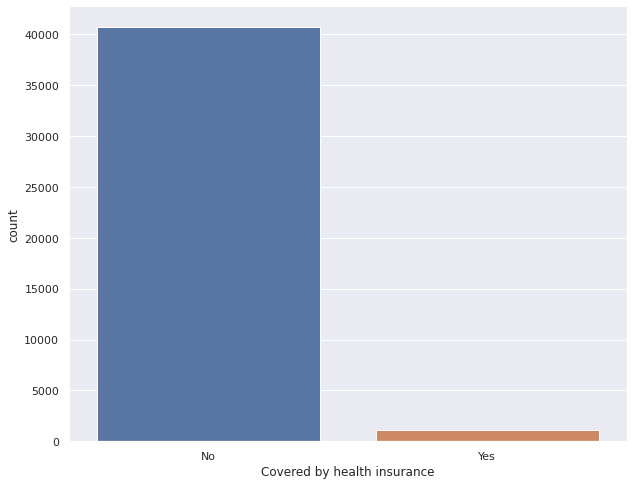

In [ ]:
sns.countplot(x='Covered by health insurance', data=df1);